## NLP & MultiClass Classification: Corporate messaging
https://www.crowdflower.com/data-for-everyone/

** Dataset Information: **

- 3118 corporations messages on social media

** Attribute Information:**

- _unit_id              
- _golden                
- _unit_state           
- _trusted_judgments   
- _last_judgment_at     
- category               
- category:confidence    
- category_gold         
- id                     
- screenname            
- text                 

** Objective of this project **

- classify statements as information, dialog, or action 

# Data

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load Data
df = pd.read_csv('Corporate-messaging-DFE.csv', encoding='latin')
pd.set_option('display.max_colwidth', -1)
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,category,category:confidence,category_gold,id,screenname,text
0,662822308,False,finalized,3,2/18/15 4:31,Information,1.0,NaN,4.365280e+17,Barclays,Barclays CEO stresses the importance of regulatory and cultural reform in financial services at Brussels conference http://t.co/Ge9Lp7hpyG
1,662822309,False,finalized,3,2/18/15 13:55,Information,1.0,NaN,3.860130e+17,Barclays,Barclays announces result of Rights Issue http://t.co/LbIqqh3wwG
2,662822310,False,finalized,3,2/18/15 8:43,Information,1.0,NaN,3.795800e+17,Barclays,Barclays publishes its prospectus for its å£5.8bn Rights Issue: http://t.co/YZk24iE8G6
3,662822311,False,finalized,3,2/18/15 9:13,Information,1.0,NaN,3.675300e+17,Barclays,Barclays Group Finance Director Chris Lucas is to step down at the end of the week due to ill health http://t.co/nkuHoAfnSD
4,662822312,False,finalized,3,2/18/15 6:48,Information,1.0,NaN,3.603850e+17,Barclays,Barclays announces that Irene McDermott Brown has been appointed as Group Human Resources Director http://t.co/c3fNGY6NMT


In [3]:
df['text'].tail()

3113    Wishing you a happy and healthy Thanksgiving. #BeWell                                                                                              
3114    WouldnÌ¢âÂã¢t it be great if your oven recognised your food, and knew precisely how to cook it? http://t.co/c7NWehROi4                           
3115    Yesterday, these #HealthyKids lit up Broadway with #Nestle, @iaaforg and some sporting stars: http://t.co/YdtBj60Ofz                               
3116    Yo-Jelly, Danone new brand in South Africa : the fun taste sensation of jelly &amp; the health benefits of yoghurt ! #Danone #Yojelly              
3117    Z Bhutta: Problems with food&amp;land systems include land acquistion, commodity speculation affecting food prices&amp;lack of discussion #NINS2013
Name: text, dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3118 entries, 0 to 3117
Data columns (total 11 columns):
_unit_id               3118 non-null int64
_golden                3118 non-null bool
_unit_state            3118 non-null object
_trusted_judgments     3118 non-null int64
_last_judgment_at      2811 non-null object
category               3118 non-null object
category:confidence    3118 non-null float64
category_gold          307 non-null object
id                     3118 non-null float64
screenname             3118 non-null object
text                   3118 non-null object
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 246.7+ KB


In [5]:
df.describe()

,_unit_id,_trusted_judgments,category:confidence,id
count,3.118000e+03,3118.000000,3118.000000,3.118000e+03
mean,6.642499e+08,3.435536,0.925460,3.085197e+17
std,4.306949e+06,1.391406,0.147874,1.436658e+17
min,6.628223e+08,3.000000,0.333800,2.222122e+09
25%,6.628232e+08,3.000000,1.000000,2.336488e+17
50%,6.628240e+08,3.000000,1.000000,3.473025e+17
75%,6.628248e+08,3.000000,1.000000,4.231435e+17
max,6.772783e+08,11.000000,1.000000,4.797360e+17


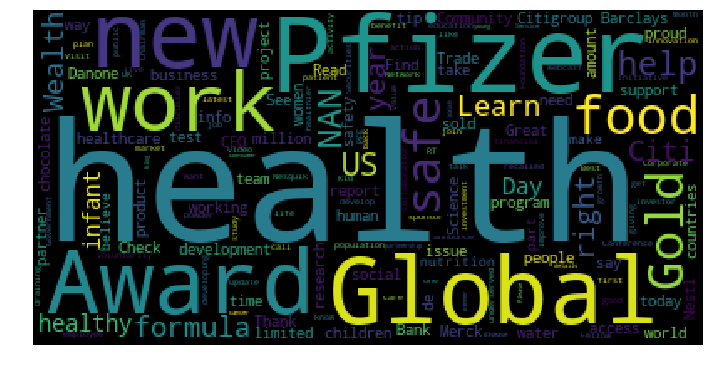

In [6]:
# word cloud
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re

def plot_word_cloud():
    text = df['text'].to_string() 
    text = re.sub(r'http\S+', '', text)
    text = re.sub('(RT|via)((?:\\b\\W*@\\w+)+)', ' ', text)
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'#\S+', '', text)
    text = re.sub('&amp', ' ', text)    
    text = re.sub('[^a-zA-Z]', ' ', text)

    wordcloud = WordCloud(
        relative_scaling=0.5,
        collocations=False,
        stopwords=set(stopwords.words('english'))).generate(text)

    plt.figure(figsize=(12,12))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

plot_word_cloud()

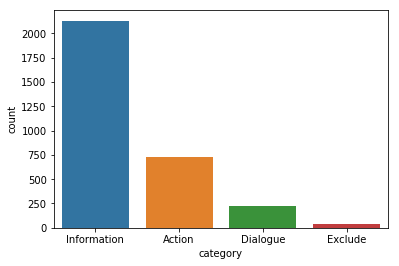

In [7]:
# inspect category
sns.countplot(df['category'])

In [3]:
# drop 'Exclude'
df = df[df['category'] != 'Exclude']
df.reset_index(inplace=True)

In [4]:
df['category'].value_counts()

Information    2129
Action         724 
Dialogue       226 
Name: category, dtype: int64

# Text preprocessing

** Clean Text**

In [6]:
import re
def clean_text(text):
    text = re.sub(r'http\S+', ' ', text)
    text = re.sub('(RT|via)((?:\\b\\W*@\\w+)+)', ' ', text)
    text = re.sub(r'@\S+', ' ', text)
    text = re.sub(r'#\S+', ' ', text)
    text = re.sub('&amp', ' ', text)
    return text

df['clean_text'] = df['text'].apply(clean_text)

#### Split Train Test sets

In [36]:
seed = 1234
np.random.seed(seed)

X = df['clean_text']
y = pd.get_dummies(df['category']).values

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y, random_state=seed)                                                    
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
np.unique(y_train, return_counts=True)

(2463,) (616,) (2463, 3) (616, 3)


(array([0, 1], dtype=uint8), array([4926, 2463], dtype=int64))

** Tokenize Text **

In [38]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(list(X_train))
max_features = len(tokenizer.word_index) + 1

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [39]:
len(X_train)
#X_train[:10]
#tokenizer.word_counts
#tokenizer.word_index

2463

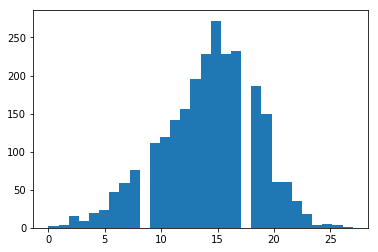

In [40]:
totalNumWords = [len(one_comment) for one_comment in X_train]
plt.hist(totalNumWords,bins = 30)
plt.show()

In [41]:
from keras.preprocessing import sequence
max_words = 25 #max(totalNumWords)
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
print(X_train.shape,X_test.shape)
#X_train[np.argmax(totalNumWords)]

(2463, 25) (616, 25)


# 1. MLP

In [83]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import (Dense,Flatten,Embedding,Dropout,Conv1D,MaxPooling1D,
                          LSTM,Bidirectional)
from keras.utils.vis_utils import model_to_dot
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from keras.callbacks import ModelCheckpoint,EarlyStopping

batch_size = 32
epochs = 20
filepath = 'weights_best_model.hdf5'

In [65]:
def get_model(max_features, embed_dim):
    np.random.seed(seed)
    K.clear_session()
    model = Sequential()
    model.add(Embedding(max_features, embed_dim, input_length=X_train.shape[1]))
    model.add(Flatten())
    model.add(Dense(60, activation='relu'))
    model.add(Dropout(0.2, seed=seed))
    model.add(Dense(30, activation='relu'))
    model.add(Dropout(0.2, seed=seed))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())    
    return model

In [44]:
def model_train(model):
    # callbacks
    early_stop = EarlyStopping(monitor='val_acc', patience=5, verbose=0, mode='max') 
    checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
    callbacks_list = [checkpoint, early_stop]
    # train the model
    model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                          epochs=epochs, batch_size=batch_size,
                          verbose=0, callbacks=callbacks_list)
    # plot train history
    plot_model_history(model_history)

In [27]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [33]:
def model_evaluate(): 
    # predict class with test set
    model.load_weights(filepath)
    y_pred_test =  model.predict_classes(X_test, batch_size=batch_size, verbose=0)
    print('Accuracy:\t{:0.1f}%'.format(accuracy_score(np.argmax(y_test,axis=1),y_pred_test)*100))
    
    #classification report
    print('\n')
    print(classification_report(np.argmax(y_test,axis=1), y_pred_test))

    #confusion matrix
    confmat = confusion_matrix(np.argmax(y_test,axis=1), y_pred_test)

    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 25, 128)           729472    
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 60)                192060    
_________________________________________________________________
dropout_1 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1830      
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 93        
Total para

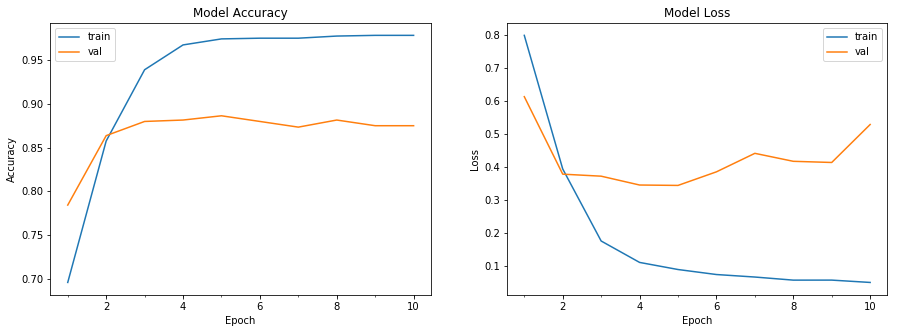

In [66]:
# train the model
max_features = len(tokenizer.word_index) + 1
embed_dim = 128
model = get_model(max_features, embed_dim)
model_train(model)

Accuracy:	88.6%


             precision    recall  f1-score   support

          0       0.86      0.78      0.82       145
          1       0.68      0.60      0.64        45
          2       0.91      0.95      0.93       426

avg / total       0.88      0.89      0.88       616



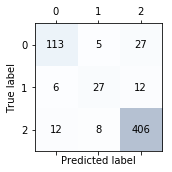

In [67]:
# evaluate model with test set
model_evaluate()

# 2. CNN

In [68]:
def get_model(max_features, embed_dim):
    np.random.seed(seed)
    K.clear_session()
    model = Sequential()
    model.add(Embedding(max_features, embed_dim, input_length=X_train.shape[1]))
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(30, activation='relu'))
    model.add(Dropout(0.2, seed=seed))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    return model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 25, 128)           729472    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 25, 32)            12320     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 12, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 12, 32)            3104      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 6, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 30)                5790      
__________

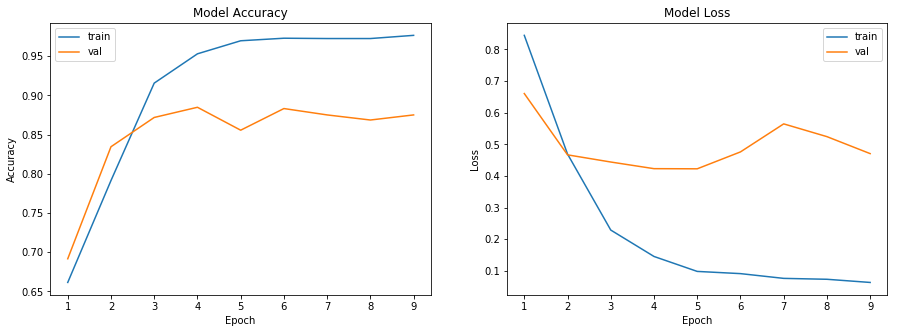

In [69]:
# train the model
max_features = len(tokenizer.word_index) + 1
embed_dim = 128
model = get_model(max_features, embed_dim)
model_train(model)

Accuracy:	88.5%


             precision    recall  f1-score   support

          0       0.85      0.81      0.83       145
          1       0.76      0.42      0.54        45
          2       0.90      0.96      0.93       426

avg / total       0.88      0.88      0.88       616



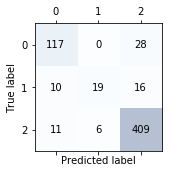

In [70]:
# evaluate model with test set
model_evaluate()

# 3. RNN

In [71]:
def get_model(max_features, embed_dim):
    np.random.seed(seed)
    K.clear_session()
    model = Sequential()
    model.add(Embedding(max_features, embed_dim, input_length=X_train.shape[1]))
    model.add(LSTM(60, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    return model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 25, 128)           729472    
_________________________________________________________________
lstm_1 (LSTM)                (None, 60)                45360     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 183       
Total params: 775,015
Trainable params: 775,015
Non-trainable params: 0
_________________________________________________________________
None
Epoch 00001: val_acc improved from -inf to 0.83929, saving model to weights_best_model.hdf5
Epoch 00002: val_acc improved from 0.83929 to 0.89286, saving model to weights_best_model.hdf5
Epoch 00003: val_acc did not improve
Epoch 00004: val_acc improved from 0.89286 to 0.89448, saving model to weights_best_model.hdf5
Epoch 00005: val_acc did not improve
Epoch 00006: val_acc did not improve
Ep

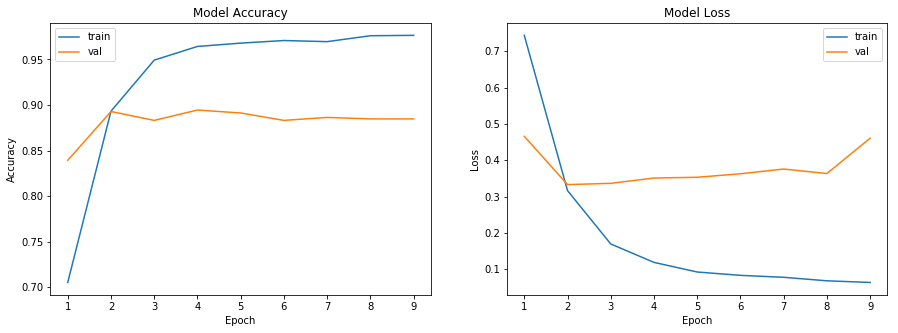

In [72]:
# train the model
max_features = len(tokenizer.word_index) + 1
embed_dim = 128
model = get_model(max_features, embed_dim)
model_train(model)

Accuracy:	89.4%


             precision    recall  f1-score   support

          0       0.89      0.77      0.83       145
          1       0.79      0.58      0.67        45
          2       0.90      0.97      0.94       426

avg / total       0.89      0.89      0.89       616



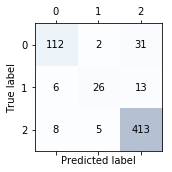

In [73]:
# evaluate model with test set
model_evaluate()

# 4. CNN + RNN

In [80]:
def get_model(max_features, embed_dim):
    np.random.seed(seed)
    K.clear_session()
    model = Sequential()
    model.add(Embedding(max_features, embed_dim, input_length=X_train.shape[1]))
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))        
    model.add(LSTM(60, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    return model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 25, 128)           729472    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 25, 32)            12320     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 12, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 12, 32)            3104      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 6, 32)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60)                22320     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 183       
Total para

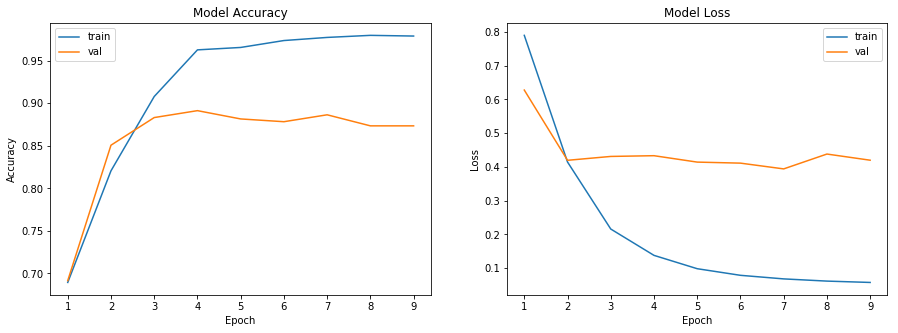

In [81]:
# train the model
max_features = len(tokenizer.word_index) + 1
embed_dim = 128
model = get_model(max_features, embed_dim)
model_train(model)

Accuracy:	89.1%


             precision    recall  f1-score   support

          0       0.92      0.76      0.83       145
          1       0.66      0.64      0.65        45
          2       0.91      0.96      0.93       426

avg / total       0.89      0.89      0.89       616



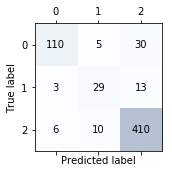

In [82]:
# evaluate model with test set
model_evaluate()

# 5. RNN: bidirectional 

In [84]:
def get_model(max_features, embed_dim):
    np.random.seed(seed)
    K.clear_session()
    model = Sequential()
    model.add(Embedding(max_features, embed_dim, input_length=X_train.shape[1]))
    model.add(Bidirectional(LSTM(60)))
    model.add(Dropout(0.2, seed=seed))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    return model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 25, 128)           729472    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 120)               90720     
_________________________________________________________________
dropout_1 (Dropout)          (None, 120)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 363       
Total params: 820,555
Trainable params: 820,555
Non-trainable params: 0
_________________________________________________________________
None
Epoch 00001: val_acc improved from -inf to 0.84416, saving model to weights_best_model.hdf5
Epoch 00002: val_acc improved from 0.84416 to 0.89123, saving model to weights_best_model.hdf5
Epoch 00003: val_acc improved from 0.89123 to 0.89935, saving model to weigh

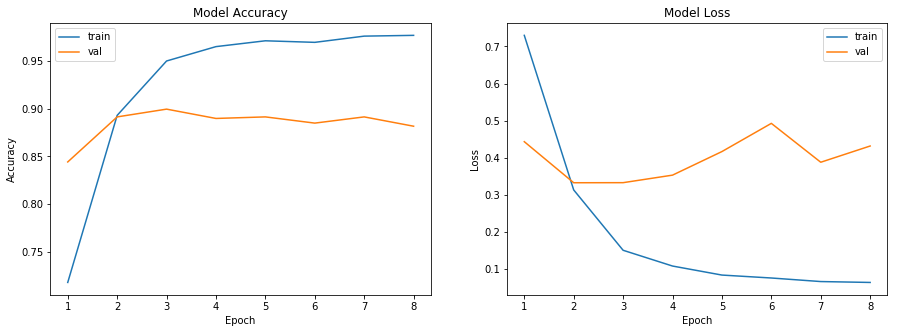

In [85]:
# train the model
max_features = len(tokenizer.word_index) + 1
embed_dim = 128
model = get_model(max_features, embed_dim)
model_train(model)

Accuracy:	89.9%


             precision    recall  f1-score   support

          0       0.89      0.79      0.84       145
          1       0.83      0.56      0.67        45
          2       0.91      0.97      0.94       426

avg / total       0.90      0.90      0.89       616



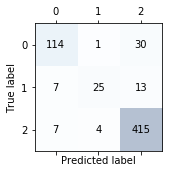

In [86]:
# evaluate model with test set
model_evaluate()

# 6. GloVe.6B.100d

In [87]:
def get_coefs(word, *arr):
    return word, np.asarray(arr, dtype='float32')
    
def get_embed_mat(EMBEDDING_FILE, max_features=12000):
    # word vectors
    embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE, encoding='utf8'))
    print('Found %s word vectors.' % len(embeddings_index))

    # embedding matrix
    word_index = tokenizer.word_index
    num_words = min(max_features, len(word_index) + 1)
    all_embs = np.stack(embeddings_index.values()) #for random init
    embedding_matrix = np.random.normal(all_embs.mean(), all_embs.std(), 
                                        (num_words, embed_dim))
    for word, i in word_index.items():
        if i >= max_features:
            continue
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    max_features = embedding_matrix.shape[0]
    
    return max_features, embedding_matrix

In [88]:
def get_model(max_features, embed_dim, embedding_matrix):
    np.random.seed(seed)
    K.clear_session()
    model = Sequential()
    model.add(Embedding(max_features, embed_dim, input_length=X_train.shape[1],
                       weights=[embedding_matrix]))#,trainable=False))  
    model.add(Bidirectional(LSTM(60)))
    model.add(Dropout(0.2, seed=seed))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    return model

Found 400000 word vectors.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 25, 100)           569900    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 120)               77280     
_________________________________________________________________
dropout_1 (Dropout)          (None, 120)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 363       
Total params: 647,543
Trainable params: 647,543
Non-trainable params: 0
_________________________________________________________________
None
Epoch 00001: val_acc improved from -inf to 0.82792, saving model to weights_best_model.hdf5
Epoch 00002: val_acc improved from 0.82792 to 0.87175, saving model to weights_best_model.hdf5
Epoch 00003: val_acc improved from 0.87175 to 0.8

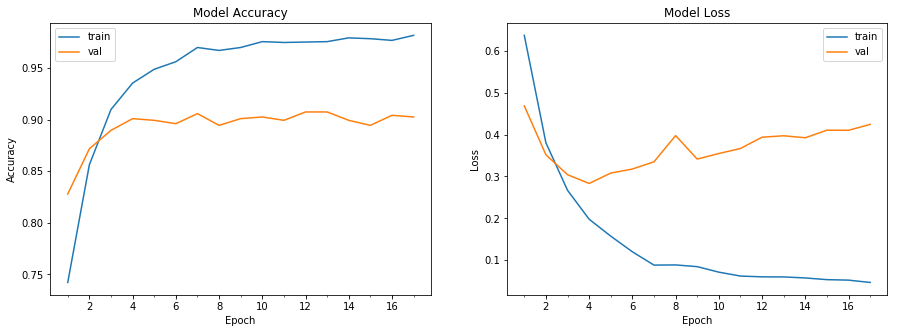

In [89]:
# embedding matrix
EMBEDDING_FILE = '../glove.6B/glove.6B.100d.txt'
embed_dim = 100 #word vector dim
max_features, embedding_matrix = get_embed_mat(EMBEDDING_FILE)

# train the model
model = get_model(max_features, embed_dim, embedding_matrix)
model_train(model)

Accuracy:	90.7%


             precision    recall  f1-score   support

          0       0.86      0.86      0.86       145
          1       0.79      0.67      0.72        45
          2       0.94      0.95      0.94       426

avg / total       0.91      0.91      0.91       616



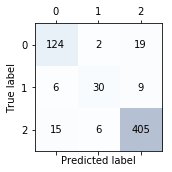

In [90]:
# evaluate model with test set
model_evaluate()

# 7. GloVe.27B.100d

Found 1193514 word vectors.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 25, 100)           569900    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 120)               77280     
_________________________________________________________________
dropout_1 (Dropout)          (None, 120)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 363       
Total params: 647,543
Trainable params: 647,543
Non-trainable params: 0
_________________________________________________________________
None
Epoch 00001: val_acc improved from -inf to 0.85552, saving model to weights_best_model.hdf5
Epoch 00002: val_acc improved from 0.85552 to 0.87662, saving model to weights_best_model.hdf5
Epoch 00003: val_acc improved from 0.87662 to 0.

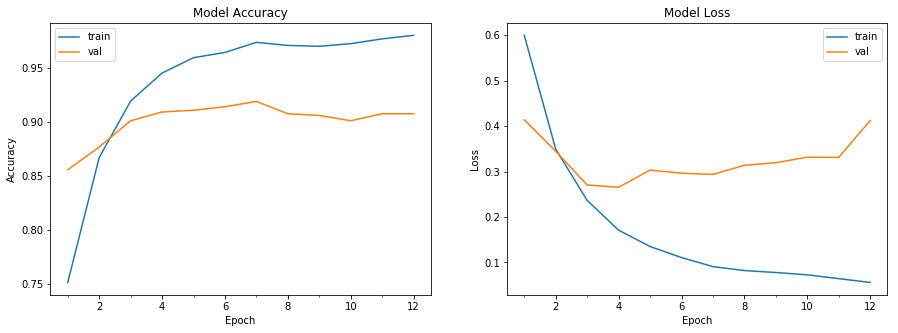

In [91]:
# embedding matrix
EMBEDDING_FILE = '../glove.twitter.27B/glove.twitter.27B.100d.txt'
embed_dim = 100 #word vector dim
max_features, embedding_matrix = get_embed_mat(EMBEDDING_FILE)

# train the model
model = get_model(max_features, embed_dim, embedding_matrix)
model_train(model)

Accuracy:	91.9%


             precision    recall  f1-score   support

          0       0.91      0.86      0.88       145
          1       0.76      0.69      0.72        45
          2       0.94      0.96      0.95       426

avg / total       0.92      0.92      0.92       616



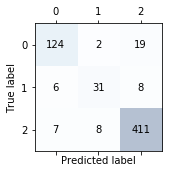

In [92]:
# evaluate model with test set
model_evaluate()